In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 5.9MB/s 


In [ ]:
import numpy as np 
import sklearn as sk
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn import linear_model
from sklearn import cluster
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ARDRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import TweedieRegressor, PoissonRegressor, GammaRegressor
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA, FastICA, fastica
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression

ImportError: ignored

In [ ]:
the_real_one_real = pd.read_csv('THE_REAL_ONE_X.csv')
X_test = pd.read_csv('DA_BIG_MAN_X_TEST.csv')
y_full = pd.read_csv('REGRESSION_FULL_Y.csv')
X_train = pd.read_csv('DA_BIG_MAN_X_TRAIN.csv')
Y_test = pd.read_csv('THE_REAL_ONE_Y_TEST_REGRESSION.csv')
Y_train = pd.read_csv('THE_REAL_ONE_Y_TRAIN_REGRESSION.csv')

In [ ]:
#the_real_one_real = the_real_one_real.drop(['pitchfork_id'], axis=1)
the_real_one_real

,popularity,total_tracks,album_duration_minutes,year,min_loudness,max_loudness,mean_loudness,stddev_loudness,label_frequency,mean_duration,min_valence,max_valence,stddev_valence,mean_valence,weighted_avg_valence,weighted_avg_speechiness,med_liveness,stddev_liveness,stddev_instrumentalness,weighted_avg_instrumentalness,explicit,weighted_avg_energy,min_danceability,max_danceability,mean_danceability,stddev_danceability,mean_acousticness,stddev_acousticness,med_acousticness,min_popularity,max_popularity,mean_popularity,stddev_popularity,key_0_pct,key_1_pct,key_2_pct,key_3_pct,key_4_pct,key_5_pct,key_6_pct,...,sig_5_pct,num_artists,num_features,artist_popularity_mean,artist_followers_mean,artist_popularity_min,artist_popularity_max,artist_followers_min,artist_followers_max,artist_popularity_stddev,artist_followers_stddev,mean_feat_artist_popularity,mean_feat_artist_followers,min_feat_artist_popularity,min_feat_artist_followers,max_feat_artist_popularity,max_feat_artist_followers,stddev_feat_artist_popularity,stddev_feat_artist_followers,genre_0_pct,genre_1_pct,genre_2_pct,genre_3_pct,genre_4_pct,genre_5_pct,genre_6_pct,genre_7_pct,genre_8_pct,genre_9_pct,genre_10_pct,genre_11_pct,genre_12_pct,genre_13_pct,genre_14_pct,genre_15_pct,genre_16_pct,genre_17_pct,genre_18_pct,genre_19_pct,genre_20_pct
0,25,10,37.699950,2021,8.695784,77.746616,71.966860,2.468588,1,3.769995,52.09,55.6,15.025998,18.476000,16.069549,3.524631,9.575,5.812945,30.604008,22.075199,0,22.089854,39.40,63.3,45.330000,10.642582,76.730000,76.730000,81.6500,10,17,12.800000,2.699794,0.000000,0.000000,30.000000,0.000000,20.000000,0.000000,0.000000,...,0.000000,1,1,18.0,538.0,18,18,538,538,0.0,0.0,24.000000,1.776000e+03,24.0,1776.0,24.0,1776.0,0.000000,0.000000e+00,0.000000,20.000000,0.000000,0.000000,10.000000,0.000000,0.000000,10.000000,0.000000,40.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,10.000000,0.000000
1,69,17,53.442883,2021,5.087701,81.197035,78.453161,1.668215,2,3.143699,75.31,82.5,20.156995,43.517059,43.974797,26.145333,11.200,10.004012,0.001001,0.000364,1,55.135105,45.40,87.3,75.317647,12.166976,12.456412,12.456412,6.9500,33,72,40.941176,8.989373,11.764706,41.176471,5.882353,0.000000,5.882353,0.000000,5.882353,...,0.000000,1,13,69.0,161226.0,69,69,161226,161226,0.0,0.0,53.230769,4.329135e+06,25.0,24.0,99.0,54616704.0,20.753128,1.511468e+07,0.000000,94.117647,0.000000,5.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,44,52,215.010783,2021,27.651865,77.851220,67.206191,7.829765,21,4.300216,83.92,87.1,21.225589,29.830000,28.973155,9.620623,11.250,13.873995,32.165156,68.565822,0,31.134999,72.37,81.6,44.774600,19.179167,84.409600,84.409600,93.0000,13,34,18.960000,4.936164,13.461538,5.769231,3.846154,5.769231,9.615385,9.615385,1.923077,...,5.769231,1,2,50.0,16453.0,50,50,16453,16453,0.0,0.0,33.000000,2.673500e+03,25.0,849.0,41.0,4498.0,11.313708,2.580233e+03,0.000000,3.846154,3.846154,5.769231,9.615385,3.846154,7.692308,5.769231,1.923077,7.692308,0.0,1.923077,0.000000,1.923077,15.384615,0.000000,3.846154,7.692308,3.846154,1.923077,9.615385
3,43,12,40.477500,2021,5.084669,79.579461,76.552764,1.577898,64,3.373125,73.80,96.7,23.668895,72.475000,74.175735,6.567317,9.125,13.549375,24.003436,18.619665,0,61.188227,51.50,87.9,69.800000,16.594961,28.157500,28.157500,16.4000,24,36,28.583333,3.824760,16.666667,0.000000,8.333333,0.000000,25.000000,25.000000,8.333333,...,8.333333,1,0,57.0,135966.0,57,57,135966,135966,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000,33.333333,25.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,16.666667,0.000000,0.000000
4,60,10,41.823017,2020,16.084775,81.914103,78.010248,4.848596,1,4.182302,71.90,90.5,28.487900,58.760000,59.015377,6.562235,32.850,17.877847,33.922389,31.894178,1,74.67

45.0
0
0.0
##############################
##############################
1
0.6683512350520662
##############################
##############################
2
0.9447239591757896
##############################
##############################
3
0.9887714063054175
##############################
##############################
4
0.996091313628438
##############################
##############################
5
0.9995421368316286
##############################
##############################
6
0.9999928487616121
##############################
##############################
7
0.9999993714026416
##############################
##############################
8
0.9999999997350398
##############################
##############################
9
0.9999999998037722
##############################
##############################
10
0.9999999998471595
##############################
##############################
11
0.9999999998788874
##############################
##############################
12
0.99999999

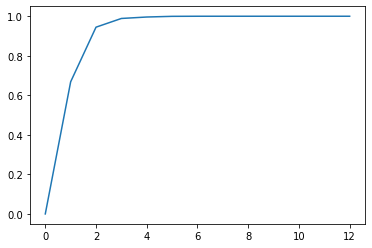

In [ ]:
sum = []
print(len(list(the_real_one_real.columns)) / 2)
for i in range(13) :
  print(i)
  pca = PCA(n_components=i)
  pca.fit_transform(the_real_one_real)
  pca.explained_variance_ratio_
  sum1 = np.sum(pca.explained_variance_ratio_)
  sum.append(sum1)
  print(sum1)
  print("##############################")
  print("##############################")


plt.figure(0)
plt.plot(range(0, 13), sum)

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

def graphRegressionMetrics(Y_test, Y_pred, X_test):
  fig, ax = plt.subplots()
  ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
  Y_test = np.array(Y_test)
  ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  plt.show()

In [ ]:
X_new = SelectKBest(mutual_info_regression, k=90).fit_transform(the_real_one, y_full)
X_new.shape


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(16442, 90)

In [ ]:
pca = PCA(n_components=2)
the_real_one_real_pca = pca.fit_transform(the_real_one_real)



X_train, X_test, y_train, y_test = train_test_split(the_real_one_real_pca, y_full, test_size=0.25, random_state=22)





reg = LinearRegression().fit(X_train, Y_train)
y_true = Y_test['score'].tolist()
CC = reg.predict(X_test)
y_pred = CC[:,0]
print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

regr = ElasticNet()
regr.fit(X_train, Y_train)
ElasticNet(random_state=0)
CC = regr.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

rr = Ridge(alpha=0.0001)
rr.fit(X_train, Y_train) 
CC = rr.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
CC = model_lasso.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = NuSVR()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = SVR()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = DecisionTreeRegressor()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = ExtraTreeRegressor()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = PoissonRegressor()

reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = TweedieRegressor()

reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

NameError: ignored

1
##############################
##############################
2


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
3
##############################
##############################
4
##############################
##############################
5
##############################
##############################
6
##############################
##############################
7
##############################
##############################
8
##############################
##############################
9
##############################
##############################
10


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
11


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
12


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
13


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
14
##############################
##############################
15


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
16


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
17
##############################
##############################
18


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
19


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
20


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
21


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
22


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
23


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
24
##############################
##############################
25


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
26


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
27
##############################
##############################
28
##############################
##############################
29
##############################
##############################
30
##############################
##############################
31


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
32


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
33


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
34


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
35


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
36


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
37


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
38


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
39


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
40
##############################
##############################
41
##############################
##############################
42


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
43
##############################
##############################
44
##############################
##############################
45


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
46
##############################
##############################
47
##############################
##############################
48
##############################
##############################
49


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
50
##############################
##############################
51
##############################
##############################
52
##############################
##############################
53
##############################
##############################
54
##############################
##############################
55
##############################
##############################
56
##############################
##############################
57
##############################
##############################
58


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
59
##############################
##############################
60


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
61
##############################
##############################
62
##############################
##############################
63


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
64
##############################
##############################
65
##############################
##############################
66


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


##############################
##############################
67
##############################
##############################
68
##############################
##############################
69
##############################
##############################
70
##############################
##############################
71
##############################
##############################
72
##############################
##############################
73
##############################
##############################
74
##############################
##############################
75
##############################
##############################
76
##############################
##############################
77
##############################
##############################
78
##############################
##############################
79
##############################
##############################
80
##############################
##############################
81
#########################

ValueError: ignored

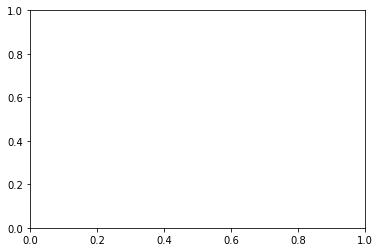

In [ ]:
sum = []
for i in range(1,120) :
  print(i)
  ica = FastICA(n_components=i)
  S_ica_ = ica.fit_transform(the_real_one_real)
  S_ica_ /= S_ica_.std(axis=0)
  sum.append(S_ica_.sum())
  print("##############################")
  print("##############################")


plt.figure(0)
plt.plot(range(1, 200), sum)

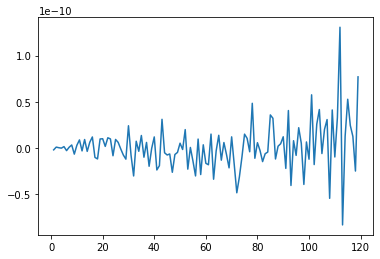

In [ ]:

plt.figure(0)
plt.plot(range(1, 120), sum)

In [ ]:


#print(len(feature_names))

ica = FastICA(n_components=90)
S_ica_ = ica.fit_transform(the_real_one_real) 

X_train, X_test, y_train, y_test = train_test_split(S_ica_, y_full, test_size=0.25, random_state=22)

feature_names = list(the_real_one_real.columns)
ax = plt.axes()
ax.figure.set_size_inches(30, 30)
im = ax.imshow(np.corrcoef(X_train.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(range(0,90))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_yticks(range(0,90))
ax.set_yticklabels(feature_names)
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Pitchfork feature correlation matrix")





reg = LinearRegression().fit(X_train, Y_train)
y_true = Y_test['score'].tolist()
CC = reg.predict(X_test)
y_pred = CC[:,0]
print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

regr = ElasticNet()
regr.fit(X_train, Y_train)
ElasticNet(random_state=0)
CC = regr.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

rr = Ridge(alpha=0.0001)
rr.fit(X_train, Y_train) 
CC = rr.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
CC = model_lasso.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = NuSVR()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = SVR()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = DecisionTreeRegressor()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = ExtraTreeRegressor()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = PoissonRegressor()

reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = TweedieRegressor()

reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

IndexError: ignored

In [ ]:
print(X_new.head())

AttributeError: ignored

Text(0.5, 1.0, 'Pitchfork feature correlation matrix')

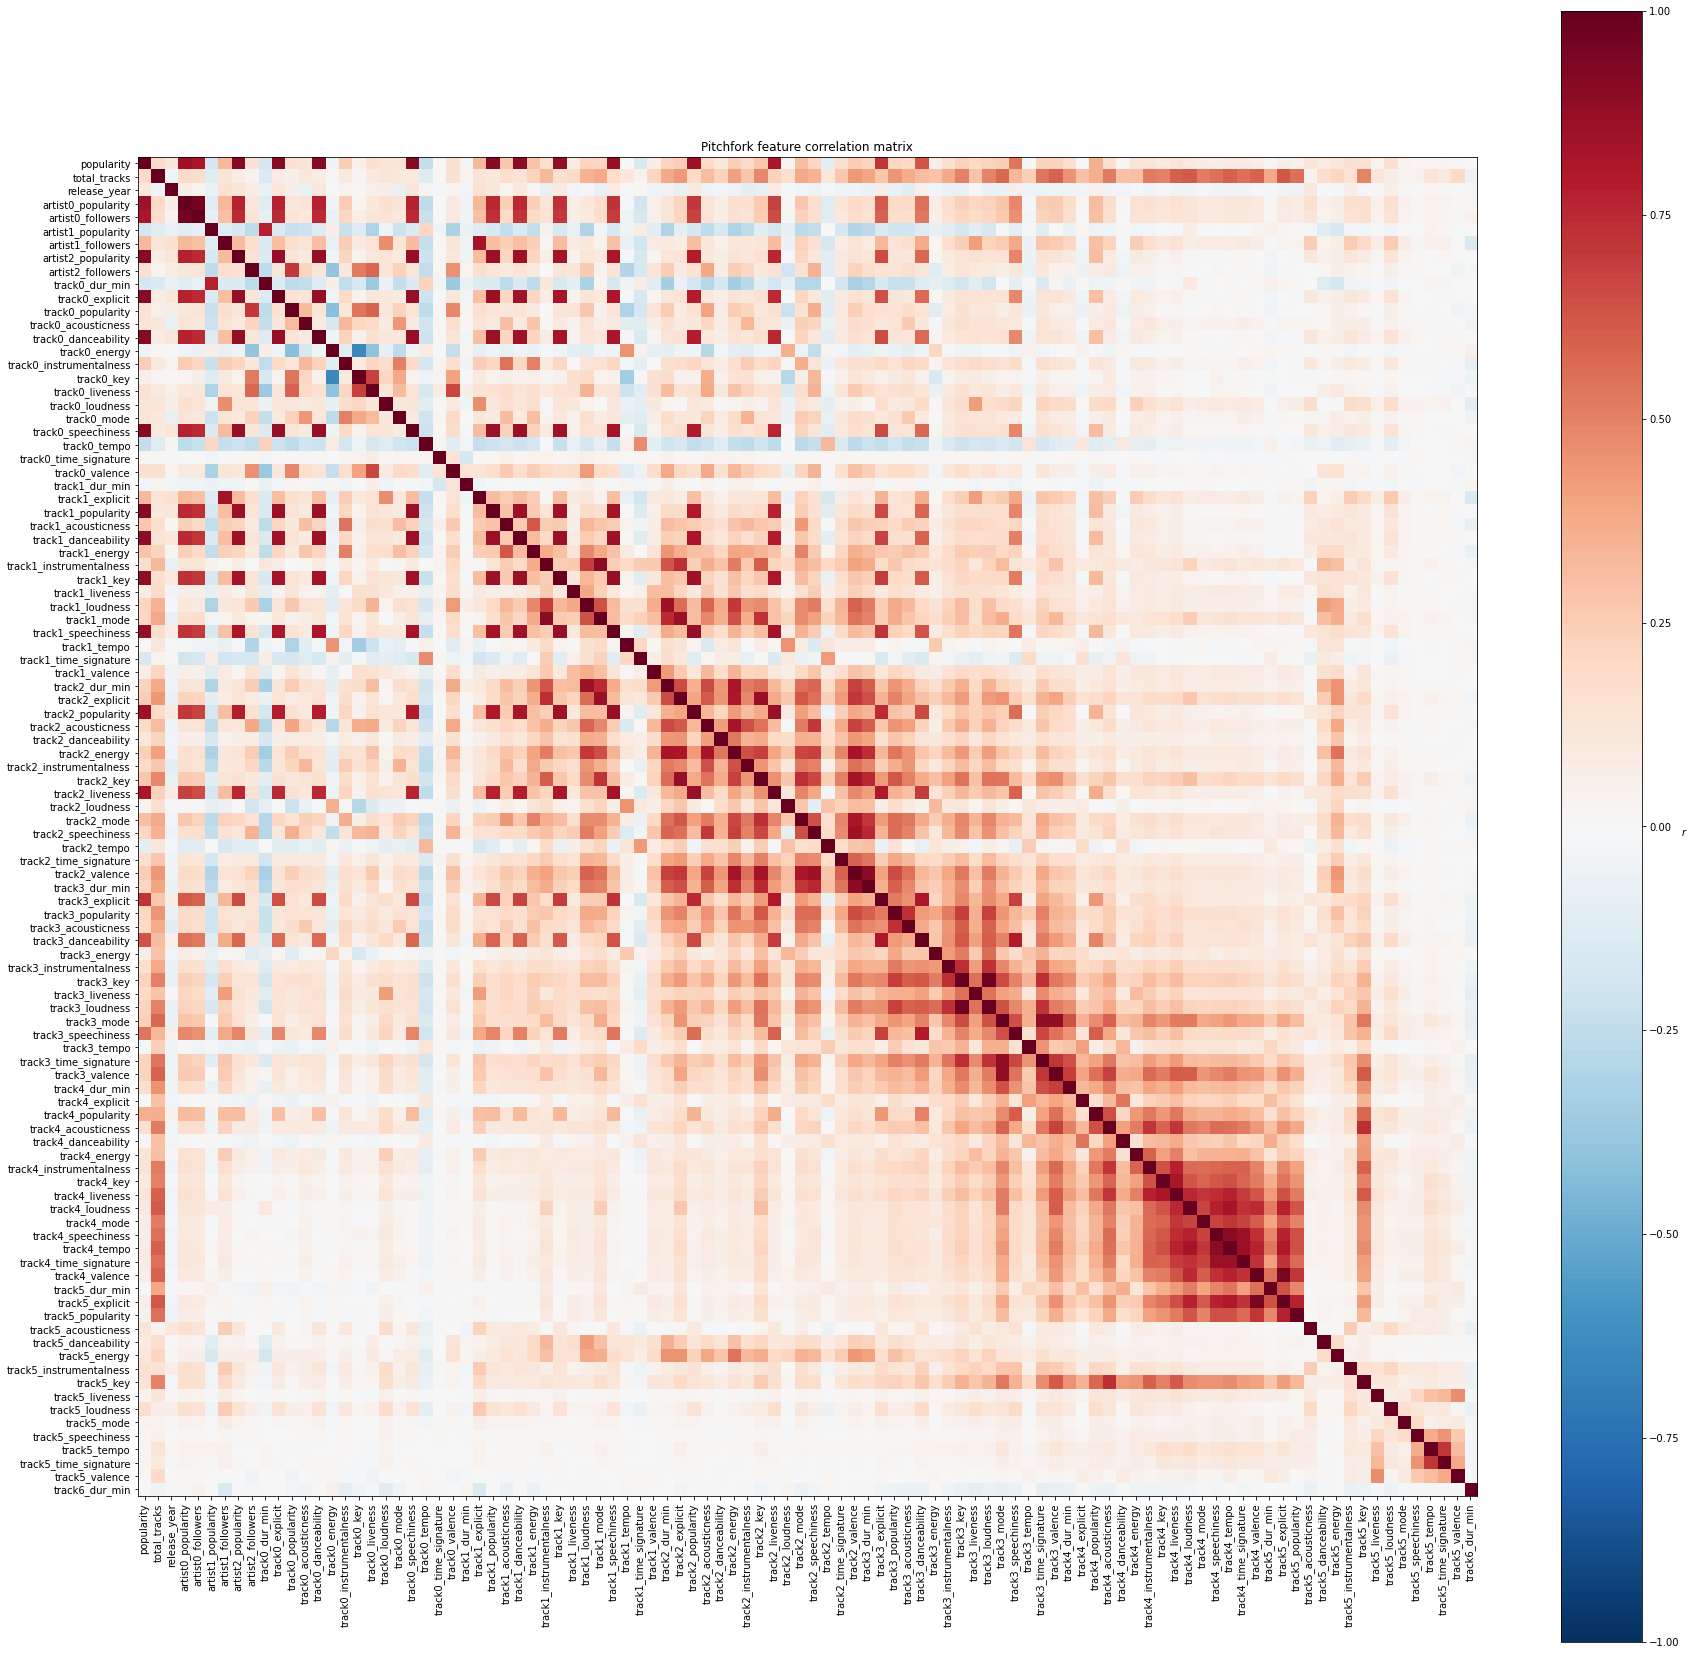

In [ ]:
#feature_names = list(X_new.columns)
#print(len(feature_names))
ax = plt.axes()
ax.figure.set_size_inches(30, 30)
im = ax.imshow(np.corrcoef(X_new.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(range(0,100))
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks(range(0,100))
ax.set_yticklabels(list(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Pitchfork feature correlation matrix")


In [ ]:
n_comps = 2

x_test = StandardScaler().fit_transform(X_test)

feature_names = list(X_test.columns)
print(len(feature_names))
ax = plt.axes()
ax.figure.set_size_inches(30, 30)
im = ax.imshow(np.corrcoef(x_test.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(range(0,len(feature_names)))
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks(range(0,len(feature_names)))
ax.set_yticklabels(list(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Pitchfork feature correlation matrix")


plt.tight_layout()

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(500, 300))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(x_test)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()